<a href="https://colab.research.google.com/github/paulokuriki/utsw-brain-hemorrhage-lecture/blob/main/augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

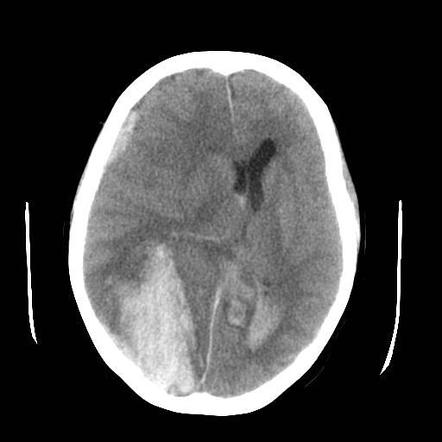

In [1]:
from IPython.display import display, Image
import requests

open('hemorrhage.jpeg', 'wb').write(requests.get('https://github.com/paulokuriki/utsw-brain-hemorrhage-lecture/blob/main/hemorrhage.jpeg?raw=true').content)

display(Image(filename='hemorrhage.jpeg'))

/usr/local/lib/python3.10/dist-packages/albumentations/imgaug/transforms.py:261: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)


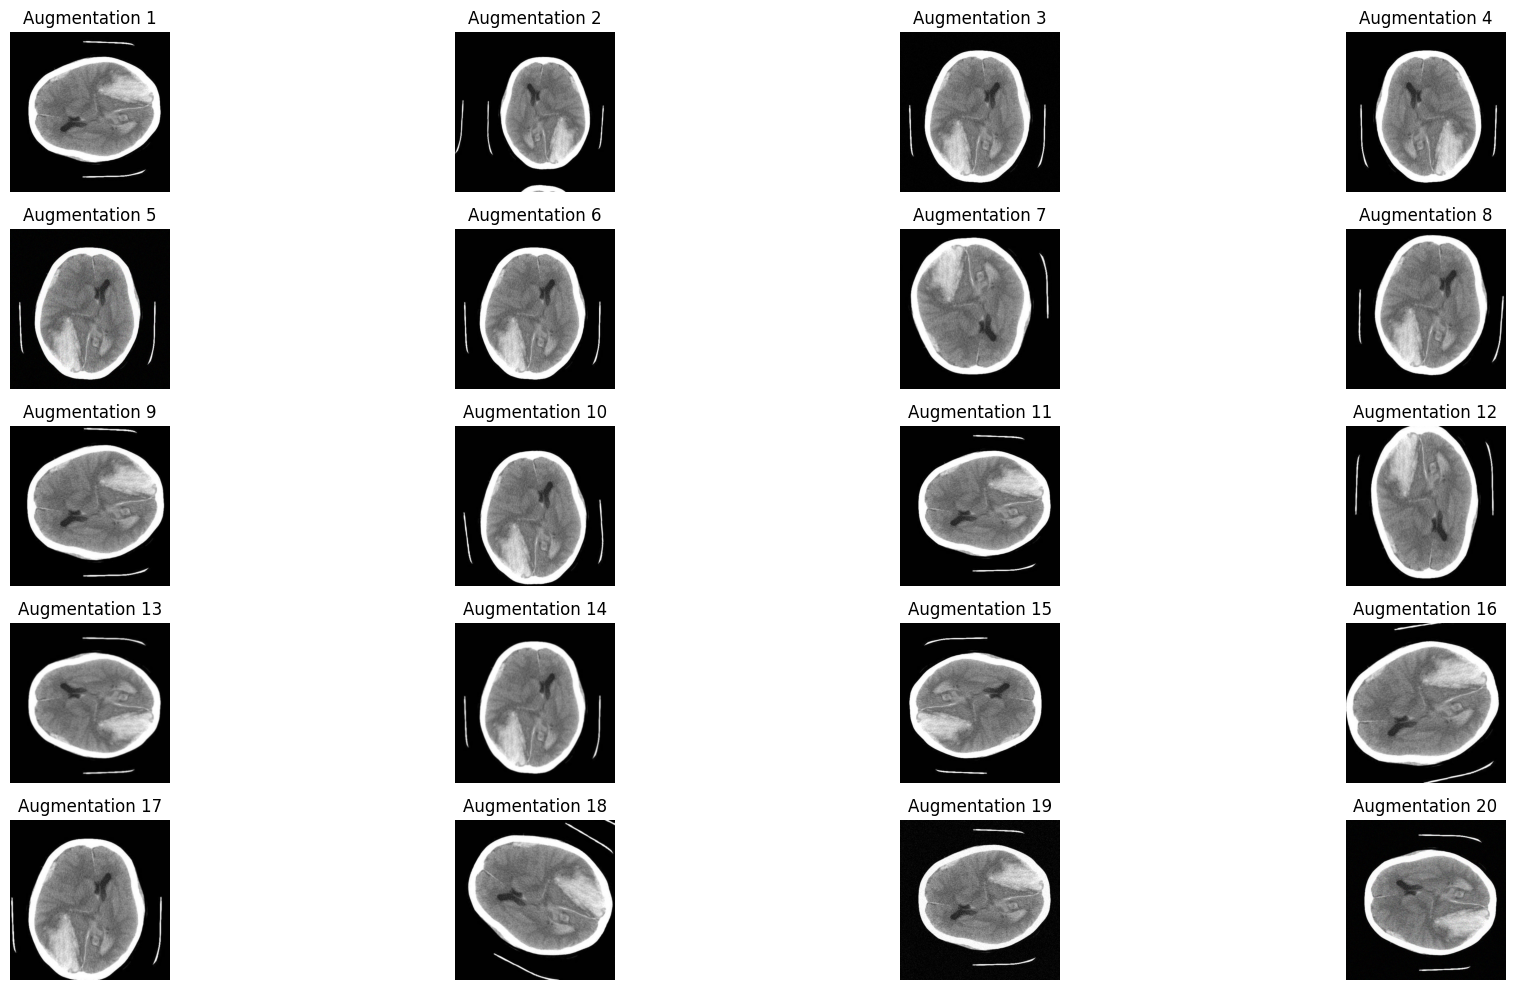

In [2]:
import cv2
import matplotlib.pyplot as plt
import albumentations as A

# Load an example image
img_path = 'hemorrhage.jpeg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Define an augmentation pipeline
transform = A.Compose([
    A.RandomRotate90(),
    A.Flip(),
    A.Transpose(),
    A.OneOf([
        A.IAAAdditiveGaussianNoise(),
        A.GaussNoise(),
    ], p=0.2),
    A.OneOf([
        A.MotionBlur(p=0.2),
        A.MedianBlur(blur_limit=3, p=0.1),
        A.Blur(blur_limit=3, p=0.1),
    ], p=0.2),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
    A.OneOf([
        A.OpticalDistortion(p=0.3),
        A.GridDistortion(p=0.1),
        A.RandomResizedCrop(height=img.shape[0], width=img.shape[1], scale=(0.8, 1.2))  # Zoom in and out
    ], p=0.2),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=0.1, val_shift_limit=0.1, p=0.3),
])

# Apply transformations and plot images
plt.figure(figsize=(20, 10))
for i in range(5):  # rows
    for j in range(4):  # columns
        plt.subplot(5, 4, i * 4 + j + 1)
        augmented_img = transform(image=img)['image']
        plt.imshow(augmented_img)
        plt.axis('off')
        plt.title(f'Augmentation {i * 4 + j + 1}')

plt.tight_layout()
plt.show()


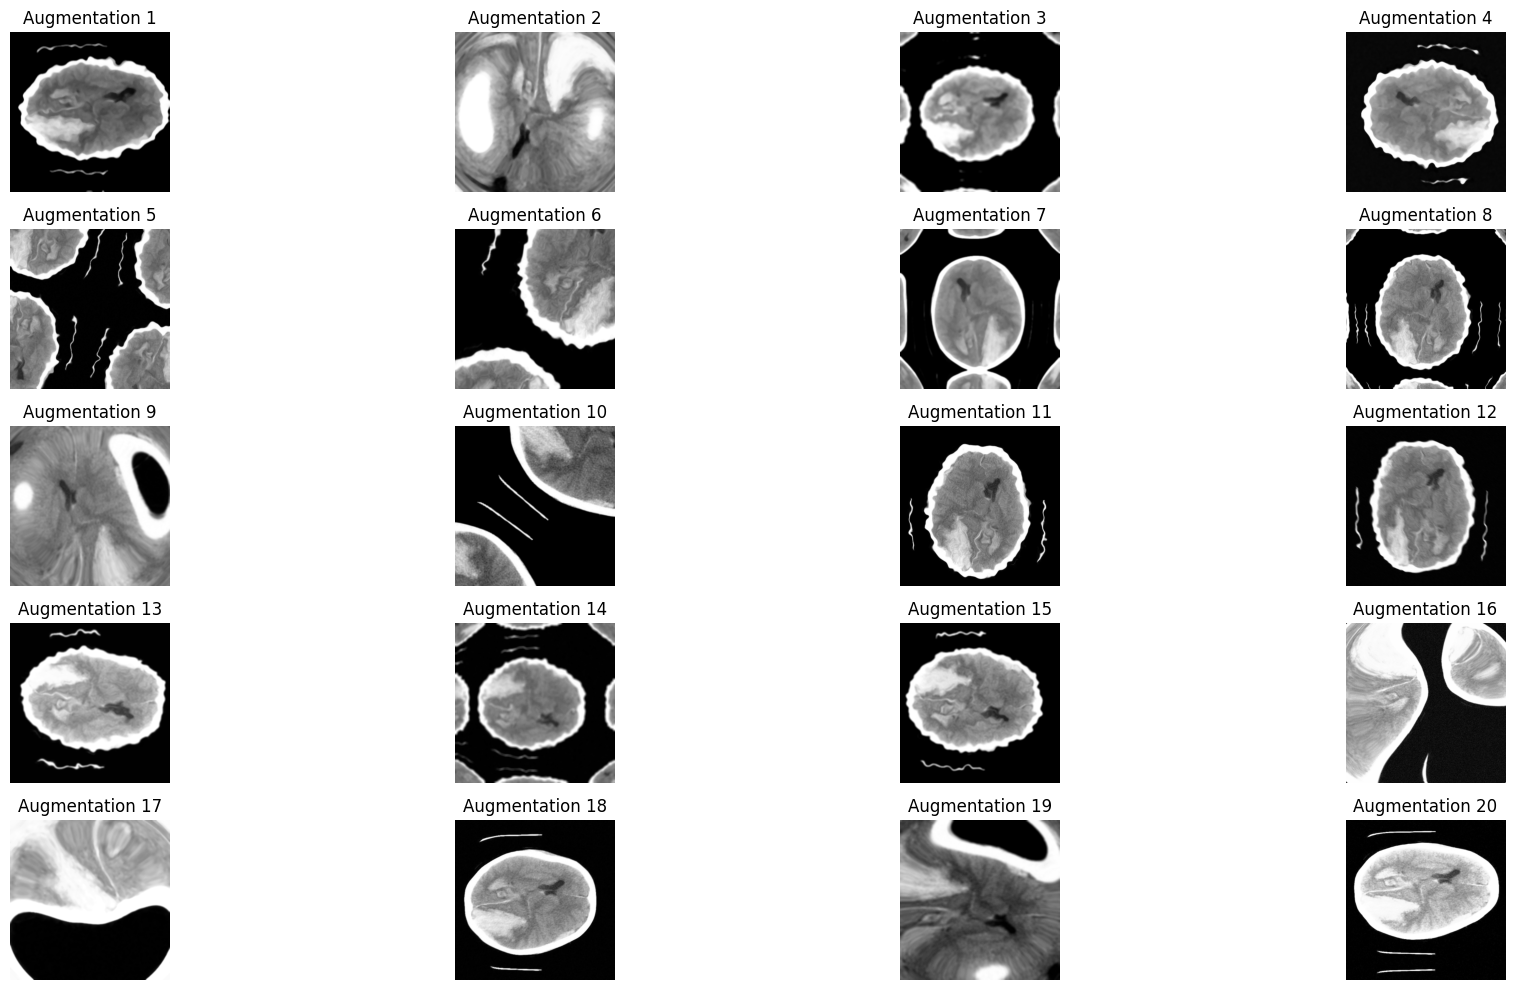

In [3]:
import cv2
import matplotlib.pyplot as plt
import albumentations as A

# Load an example image
img_path = 'hemorrhage.jpeg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Define an augmentation pipeline with distortions and without color changes
transform = A.Compose([
    A.RandomRotate90(),
    A.Flip(),
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.5, scale_limit=0.5, rotate_limit=45, p=0.5),
    A.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
    A.GridDistortion(),
    A.OpticalDistortion(distort_limit=2, shift_limit=0.5),
    A.GaussNoise(var_limit=(10.0, 50.0), mean=0),
    A.MultiplicativeNoise(multiplier=[0.5, 1.5], per_channel=True, p=1),
    A.ISONoise(color_shift=(0.01, 0.05), intensity=(0.1, 0.5), p=0.2),
    A.RandomGamma(gamma_limit=(80, 120), p=0.6),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2),
    A.MotionBlur(blur_limit=5),
    A.MedianBlur(blur_limit=7),
    A.Blur(blur_limit=7),
])

# Apply transformations and plot images
plt.figure(figsize=(20, 10))
for i in range(5):  # rows
    for j in range(4):  # columns
        plt.subplot(5, 4, i * 4 + j + 1)
        augmented_img = transform(image=img)['image']
        augmented_img_gray = cv2.cvtColor(augmented_img, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
        plt.imshow(augmented_img_gray, cmap='gray')  # Ensure the displayed image is grayscale
        plt.axis('off')
        plt.title(f'Augmentation {i * 4 + j + 1}')

plt.tight_layout()
plt.show()
